In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import time # Import the time module
import os # Import the os module
import matplotlib.pyplot as plt # Add this line
import seaborn as sns # Import the seaborn library with the alias sns
from IPython import get_ipython
from IPython.display import display
from sklearn.datasets import fetch_california_housing

In [ ]:
# %%
# Step 2: Mount Google Drive for access
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %%
# Step 3: Load dataset from Google Drive

# Change the path to your uploaded 'boston.csv' file inside Google Drive
# Make sure this path EXACTLY matches the location and name of your file in Google Drive
dataset_path = '/content/drive/MyDrive/BostonHousing.csv' # <-- **VERIFY AND UPDATE THIS LINE**

# Initialize df to None before attempting to load
df = None

# Add a check for the specific file path using os.path.exists
print(f"\nChecking if file exists at path: {dataset_path}")

if os.path.exists(dataset_path):
    print(f"File found at {dataset_path}. Attempting to read.")

    # Read the CSV file into a pandas DataFrame
    # This will only execute if the file is found
    try:
        df = pd.read_csv(dataset_path)
        print("Dataset loaded successfully!")
        # Display the first few rows to confirm it loaded correctly
        display(df.head())
    except Exception as e:
        print(f"An error occurred while reading the CSV: {e}")

else:
    print(f"Error: File not found at {dataset_path}.")
    print("Please verify the following:")
    print("1. Google Drive is successfully mounted.")
    print(f"2. The path '{dataset_path}' is correct and the file 'BostonHousing.csv' exists at this exact location in your Google Drive.")
    print("You can use `!ls -l /content/drive/MyDrive/` to list files in your root My Drive directory.")
    # You might want to raise an error or exit here if the data is essential for subsequent steps
    # For now, we'll just print the error message.


Checking if file exists at path: /content/drive/MyDrive/BostonHousing.csv
File found at /content/drive/MyDrive/BostonHousing.csv. Attempting to read.
Dataset loaded successfully!


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Add a check for the specific file path using os.path.exists
print(f"\nChecking if file exists at path: {dataset_path}")

if os.path.exists(dataset_path):
    print(f"File found at {dataset_path}. Attempting to read.")

    # Read the CSV file into a pandas DataFrame
    # This will only execute if the file is found
    try:
        df = pd.read_csv(dataset_path)
        print("Dataset loaded successfully!")
        # Display the first few rows to confirm it loaded correctly
        display(df.head())
    except Exception as e:
        print(f"An error occurred while reading the CSV: {e}")

else:
    print(f"Error: File not found at {dataset_path}.")
    print("Please verify the following:")
    print("1. Google Drive is successfully mounted.")
    print("2. The path '{dataset_path}' is correct and the file 'BostonHousing.csv' exists at this exact location in your Google Drive.")
    print("You can use `!ls -l /content/drive/MyDrive/` to list files in your root My Drive directory.")
    # You might want to stop execution here or handle the error appropriately
    # For now, we'll just print the error message and let the notebook continue without loading the data.

# Remove the duplicate data loading code from the cell that caused the error.
# Ensure that only the code above, which includes the existence check, is used for loading the data.



Checking if file exists at path: /content/drive/MyDrive/BostonHousing.csv
File found at /content/drive/MyDrive/BostonHousing.csv. Attempting to read.
Dataset loaded successfully!


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#!ls -l /content/drive/MyDrive/

In [ ]:
# Add a small delay after mounting to ensure accessibility
print("Waiting for Google Drive to mount...")
time.sleep(10) # Wait for 10 seconds

Waiting for Google Drive to mount...


In [ ]:
# %%
# Step 4: Inspect the dataset
# Check if df was successfully loaded before trying to use it
if df is not None:
    print("\nInspecting the dataset:")
    print(df.head())
    print(df.columns)
else:
    print("\nDataset (df) was not loaded successfully, skipping inspection.")


Inspecting the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  
Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'price'],
      dtype='object')


In [ ]:
# %%
# Optional: List files in My Drive to help with path verification
#!ls -l /content/drive/MyDrive/

In [ ]:
# Usually Boston dataset has 'MEDV' as target
# If your csv file has the same, proceed

# Print the column names to verify the correct target column name
print("DataFrame columns:", df.columns.tolist())

# Replace 'MEDV' with the actual name of the target column if it's different.
# For example, if the target column is named 'medv', you would change the lines below to:
# X = df.drop('medv', axis=1)
# y = df['medv']

# Based on the standard Boston Housing dataset, 'MEDV' is the correct name.
# If the print statement above shows 'MEDV' is NOT in the list, check your CSV file.
# Assuming 'MEDV' is the correct name based on the intention of the code:
# --- FIX STARTS HERE ---
# Replace 'MEDV' with the correct column name identified from the print output
# Based on the output, the correct column name is 'price'
target_column_name = 'price' # <--- **UPDATED based on the print output**

# Check if the target column exists before attempting to drop/select
if target_column_name in df.columns:
    X = df.drop(target_column_name, axis=1)
    y = df[target_column_name]
    print(f"Successfully set target variable '{target_column_name}'.")
    print("Features (X) shape:", X.shape)
    print("Target (y) shape:", y.shape)
else:
    print(f"Error: Target column '{target_column_name}' not found in the DataFrame.")
    print("Please check the column names printed above and update the 'target_column_name' variable accordingly.")
    # You might want to raise an error or exit here if the target column is essential
    # For now, we'll just print the error message.
# --- FIX ENDS HERE ---

DataFrame columns: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'price']
Successfully set target variable 'price'.
Features (X) shape: (506, 13)
Target (y) shape: (506,)


In [ ]:
# Step 5: Split dataset in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
# Load the California housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

In [ ]:

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Step 6: Set the style for seaborn
sns.set(style="whitegrid")

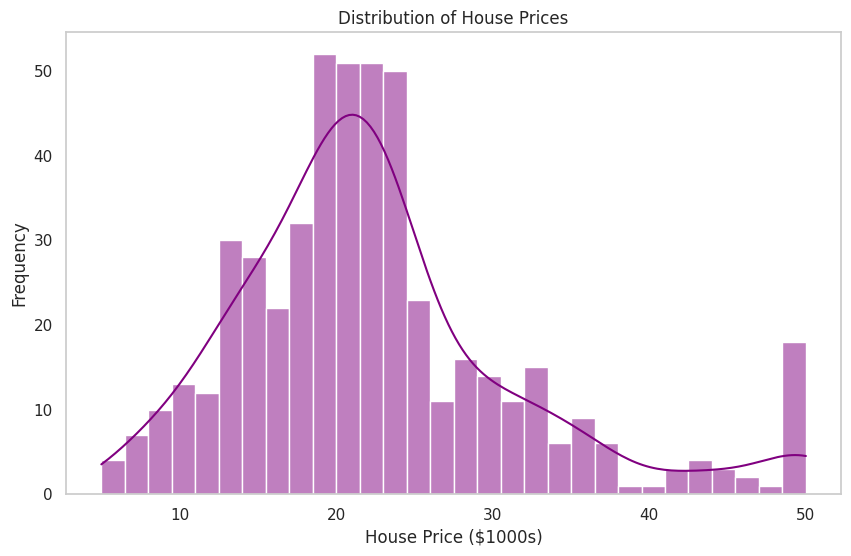

In [ ]:
# Step 7: Visualizations
# Import matplotlib.pyplot
import matplotlib.pyplot as plt # Add this line

# 1. Distribution of House Prices
plt.figure(figsize=(10, 6))
# Based on the print output in the previous cell, the correct column name is 'price', not 'MEDV'.
# Update 'MEDV' to 'price' to plot the distribution of the actual price column in your DataFrame.
sns.histplot(df['price'], bins=30, kde=True, color='purple') # Changed 'MEDV' to 'price'
plt.title('Distribution of House Prices')
plt.xlabel('House Price ($1000s)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

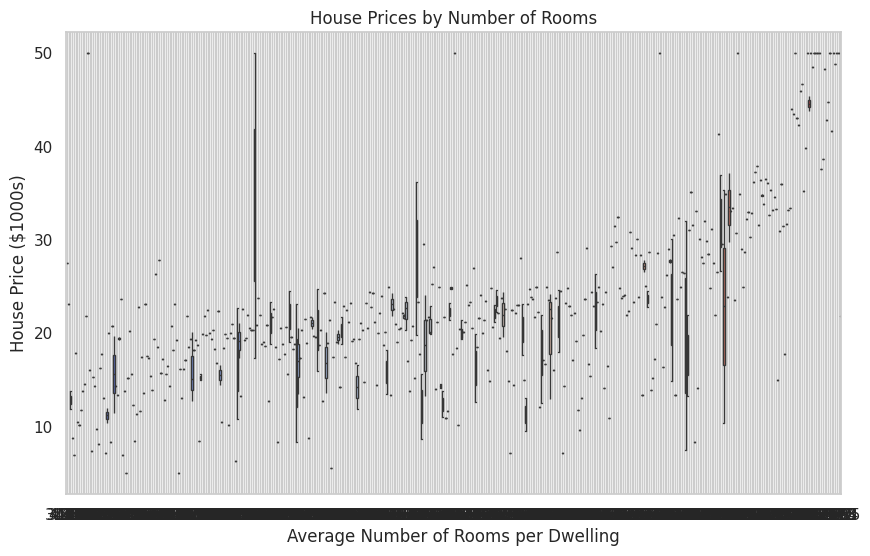

In [ ]:
# 2. Boxplot of House Prices by Number of Rooms
plt.figure(figsize=(10, 6))
# Based on the print output in the previous cell and common datasets,
# 'price' is the target column and 'rm' is likely the rooms column name.
# Update 'RM' to the actual column name for rooms (e.g., 'rm') and 'MEDV' to 'price'.
sns.boxplot(x='rm', y='price', data=df, palette='coolwarm') # Changed 'RM' to 'rm' and 'MEDV' to 'price'
plt.title('House Prices by Number of Rooms')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('House Price ($1000s)')
plt.grid()
plt.show()

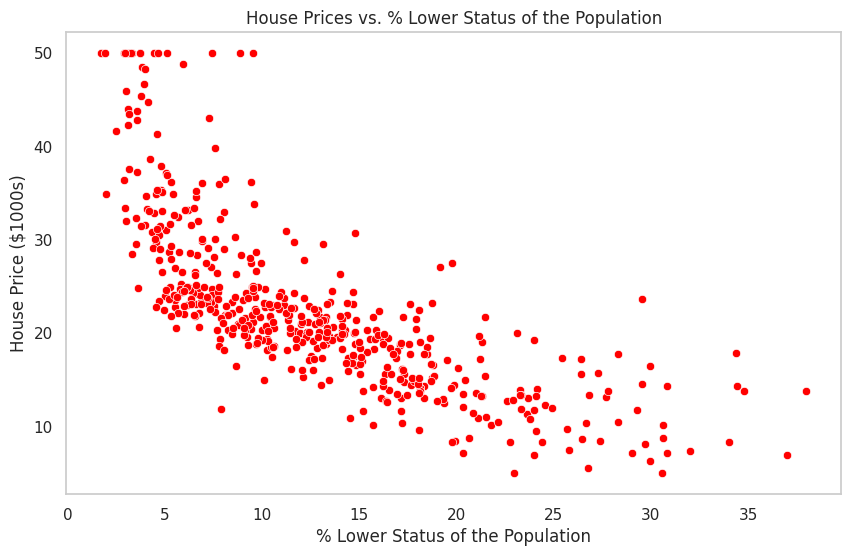

In [ ]:
# 3. Scatter Plot of House Prices vs. LSTAT
plt.figure(figsize=(10, 6))
# Update 'LSTAT' to 'lstat' and 'MEDV' to 'price' based on the DataFrame's actual column names
sns.scatterplot(x='lstat', y='price', data=df, color='red') # Changed 'LSTAT' to 'lstat' and 'MEDV' to 'price'
plt.title('House Prices vs. % Lower Status of the Population')
plt.xlabel('% Lower Status of the Population')
plt.ylabel('House Price ($1000s)')
plt.grid()
plt.show()

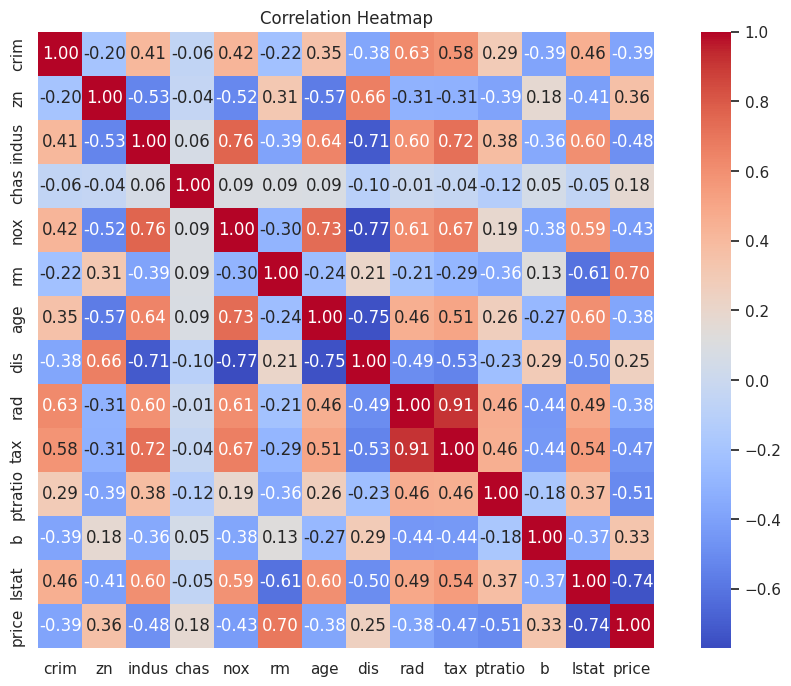

In [ ]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

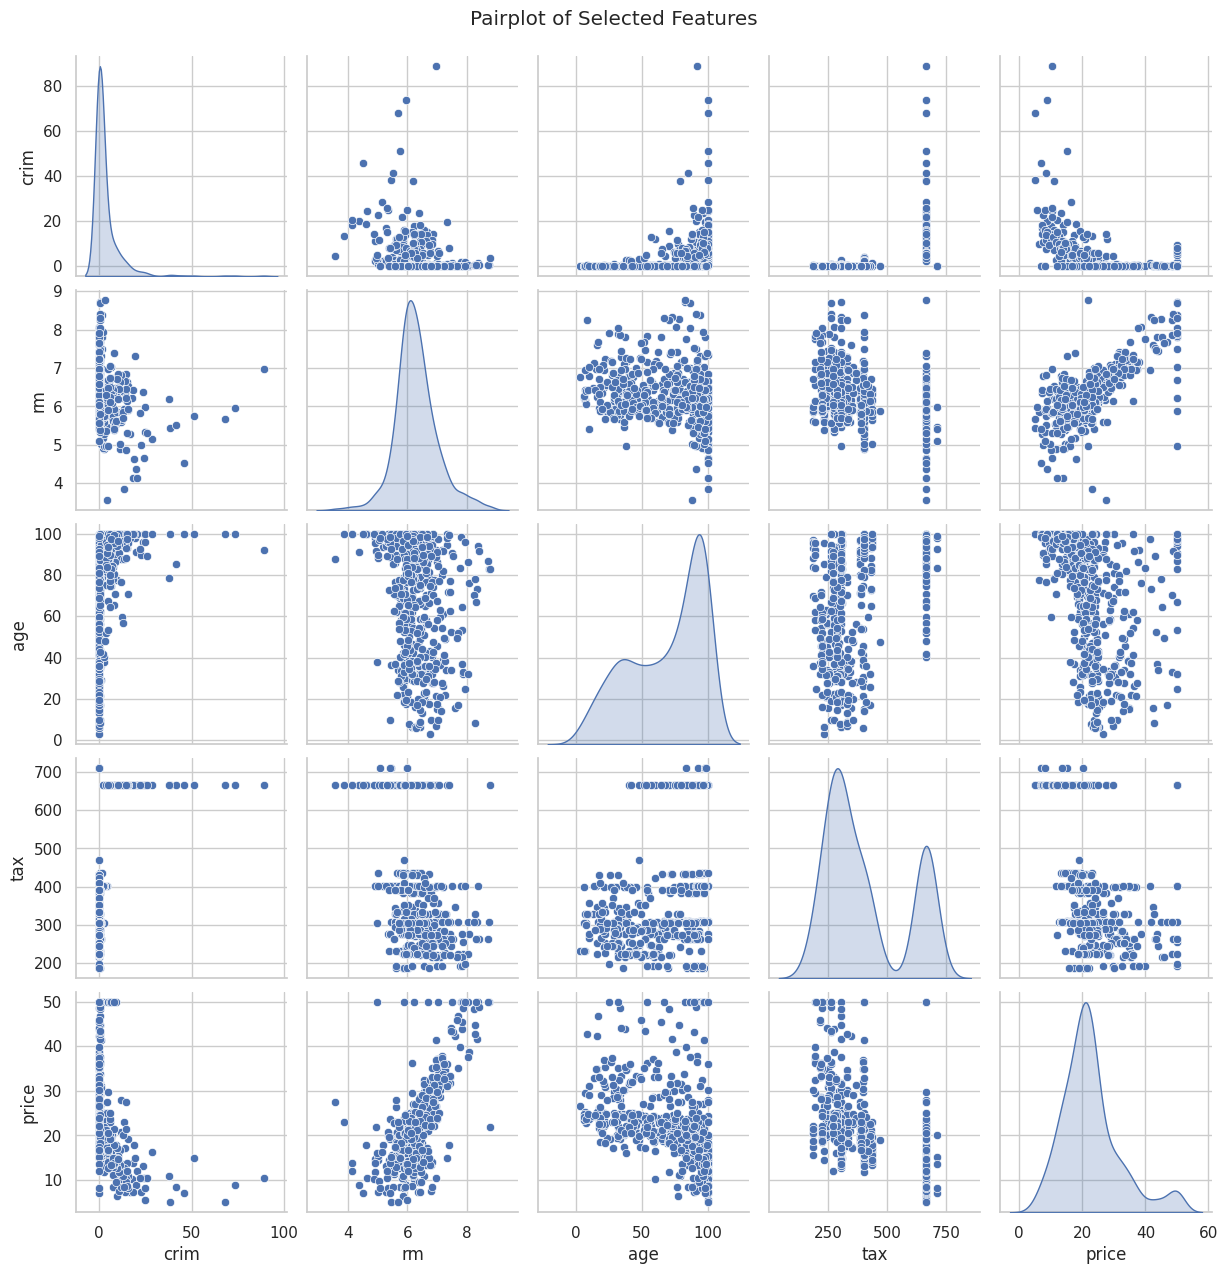

In [ ]:
# 5. Pairplot of Selected Features
# Update the list of selected features to match the actual column names in the DataFrame
# Based on previous successes with lowercase column names and 'price' for the target:
selected_features = ['crim', 'rm', 'age', 'tax', 'price'] # Changed column names to lowercase and replaced 'MEDV' with 'price'
sns.pairplot(df[selected_features], diag_kind='kde', markers='o', palette='coolwarm')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

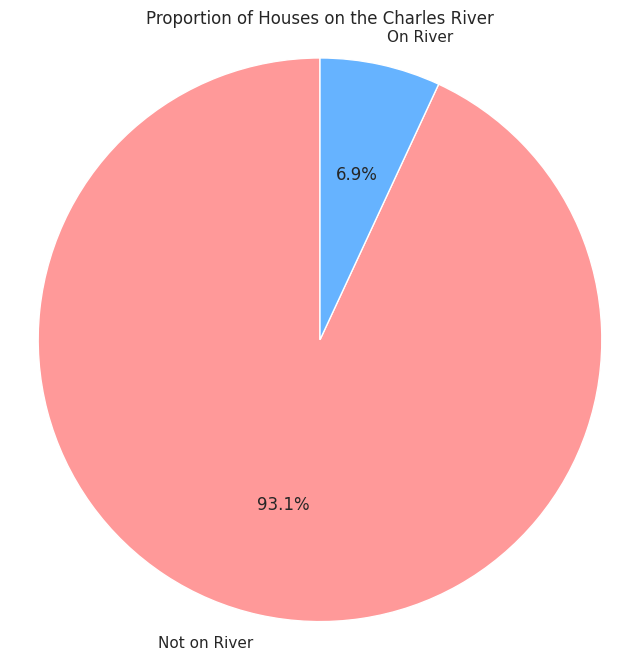

In [ ]:
# Step 6: Additional Visualizations
# 1. Pie Chart of Charles River Dummy Variable (CHAS)
plt.figure(figsize=(8, 8))
# Based on the previous column name issues, the 'CHAS' column is likely named 'chas'
# Check the DataFrame's columns by printing df.columns if unsure.
# Assuming the column name is 'chas' in lowercase:
chas_counts = df['chas'].value_counts() # Changed 'CHAS' to 'chas'
plt.pie(chas_counts, labels=['Not on River', 'On River'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
plt.title('Proportion of Houses on the Charles River')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

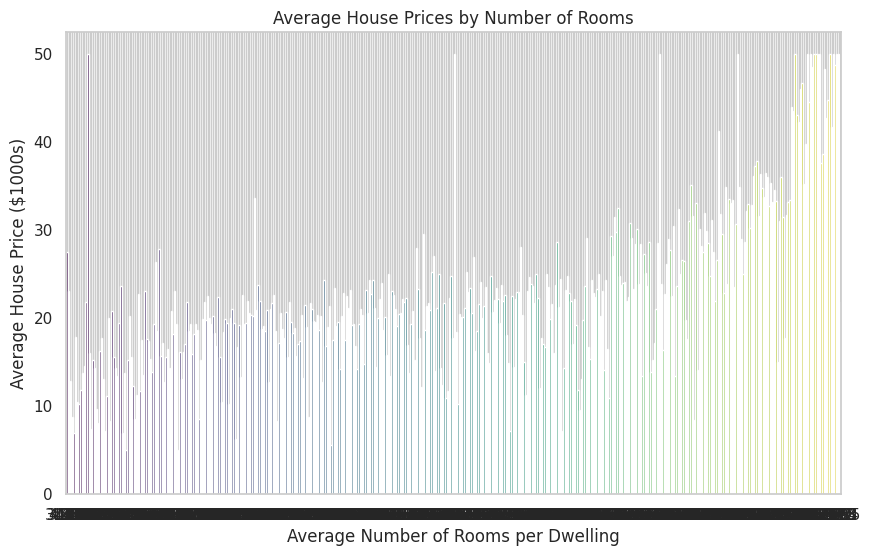

In [ ]:
# 2. Bar Plot of Average House Prices by Number of Rooms
plt.figure(figsize=(10, 6))
# Correct the column names from 'RM' to 'rm' and 'MEDV' to 'price'
avg_price_by_rm = df.groupby('rm')['price'].mean().reset_index()
sns.barplot(x='rm', y='price', data=avg_price_by_rm, palette='viridis') # Corrected column names here as well
plt.title('Average House Prices by Number of Rooms')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Average House Price ($1000s)')
plt.grid()
plt.show()

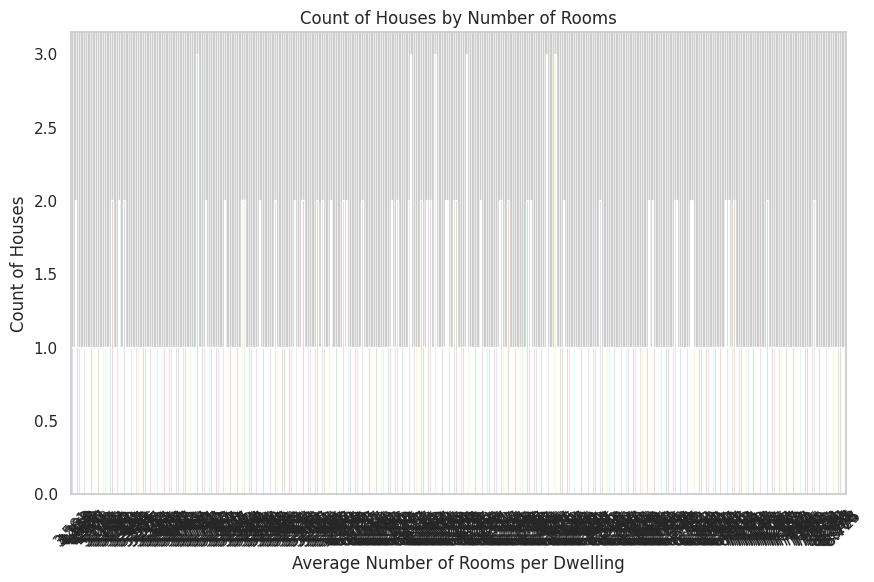

In [ ]:
# 3. Count Plot of Houses by Number of Rooms
plt.figure(figsize=(10, 6))
# Change 'RM' to 'rm' to match the likely column name in the DataFrame
sns.countplot(x='rm', data=df, palette='pastel') # Changed 'RM' to 'rm'
plt.title('Count of Houses by Number of Rooms')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Count of Houses')
plt.grid()
plt.xticks(rotation=45)
plt.show()

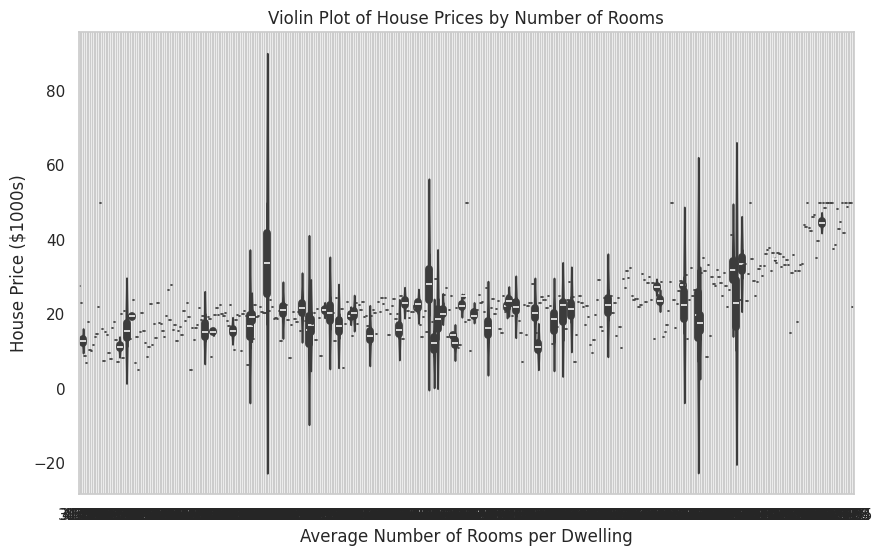

In [ ]:
# 4. Violin Plot of House Prices by Number of Rooms
plt.figure(figsize=(10, 6))
# Update the column names to lowercase 'rm' and 'price'
sns.violinplot(x='rm', y='price', data=df, palette='muted')
plt.title('Violin Plot of House Prices by Number of Rooms')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('House Price ($1000s)')
plt.grid()
plt.show()

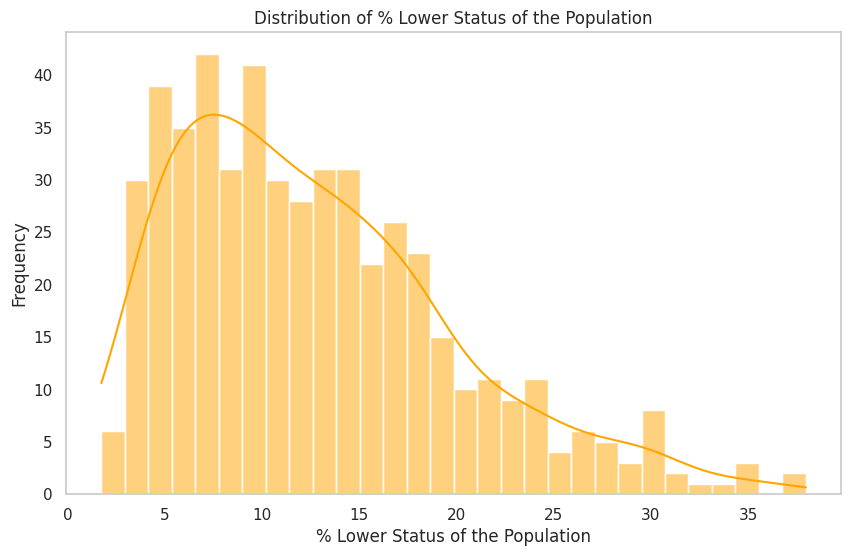

In [ ]:
# Step 6: Additional Visualizations
# 5. Distribution of LSTAT with KDE
plt.figure(figsize=(10, 6))
# Change 'LSTAT' to the correct lowercase column name 'lstat'
sns.histplot(df['lstat'], bins=30, kde=True, color='orange') # Corrected 'LSTAT' to 'lstat'
plt.title('Distribution of % Lower Status of the Population')
plt.xlabel('% Lower Status of the Population')
plt.ylabel('Frequency')
plt.grid()
plt.show()

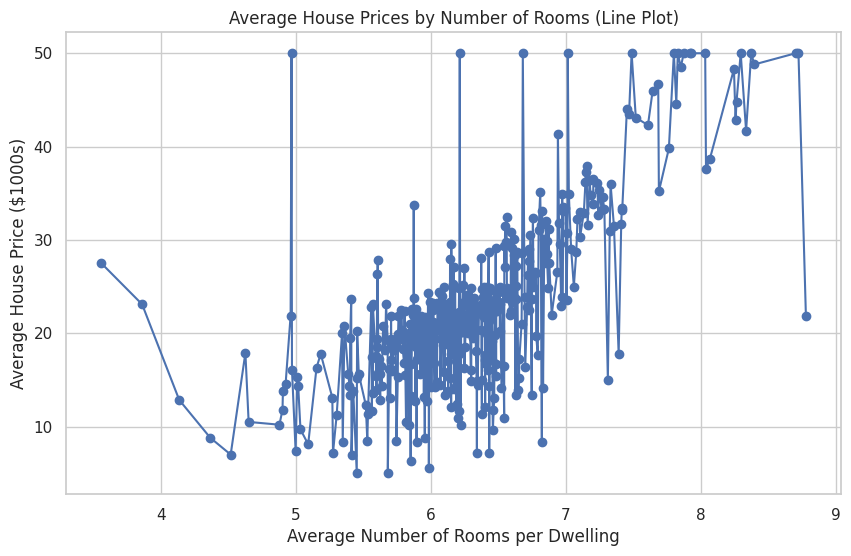

In [ ]:
# Step 7: Additional Visualizations (Continued)
# 6. Line Plot of Average House Prices by Number of Rooms

# Group the data by 'rm' and calculate the mean of 'price' for each group
avg_price_by_rm = df.groupby('rm')['price'].mean().reset_index()

# Sort the results by number of rooms for a logical line plot progression
avg_price_by_rm = avg_price_by_rm.sort_values(by='rm')

plt.figure(figsize=(10, 6))

# Create the line plot
# Use the sorted DataFrame
plt.plot(avg_price_by_rm['rm'], avg_price_by_rm['price'], marker='o', linestyle='-')

plt.title('Average House Prices by Number of Rooms (Line Plot)')
plt.xlabel('Average Number of Rooms per Dwelling')
plt.ylabel('Average House Price ($1000s)')
plt.grid(True) # Add a grid for better readability
plt.show()

In [ ]:
# Save the model
joblib.dump(model, 'model.pkl')

['model.pkl']